<a href="https://colab.research.google.com/github/jessamcs/Week6_regression/blob/main/RegressionWeek6_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
# Import SVM Regressor
from sklearn import svm

#Linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

#Linear regression 2
lm = LinearRegression()
lm.fit(X_train, y_train)

regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

#Linewar Regression
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Import XGBoost Regressor
from xgboost import XGBRegressor
reg = XGBRegressor()
reg.fit(X_train, y_train)

#Import
column_names = ['CRIM',  'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT', 'PRICE']

data= read_csv('/content/Boston_Housing_from_Sklearn.csv')
print(data.head(5))


[09:04:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
      CRIM    NOX     RM   AGE  PTRATIO  LSTAT  PRICE
0  0.00632  0.538  6.575  65.2     15.3   4.98   24.0
1  0.02731  0.469  6.421  78.9     17.8   9.14   21.6
2  0.02729  0.469  7.185  61.1     17.8   4.03   34.7
3  0.03237  0.458  6.998  45.8     18.7   2.94   33.4
4  0.06905  0.458  7.147  54.2     18.7   5.33   36.2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [12]:
print(np.shape(data))

(506, 7)


In [13]:
print(data.describe())

             CRIM         NOX          RM  ...     PTRATIO       LSTAT       PRICE
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524    0.554695    6.284634  ...   18.455534   12.653063   22.532806
std      8.601545    0.115878    0.702617  ...    2.164946    7.141062    9.197104
min      0.006320    0.385000    3.561000  ...   12.600000    1.730000    5.000000
25%      0.082045    0.449000    5.885500  ...   17.400000    6.950000   17.025000
50%      0.256510    0.538000    6.208500  ...   19.050000   11.360000   21.200000
75%      3.677082    0.624000    6.623500  ...   20.200000   16.955000   25.000000
max     88.976200    0.871000    8.780000  ...   22.000000   37.970000   50.000000

[8 rows x 7 columns]


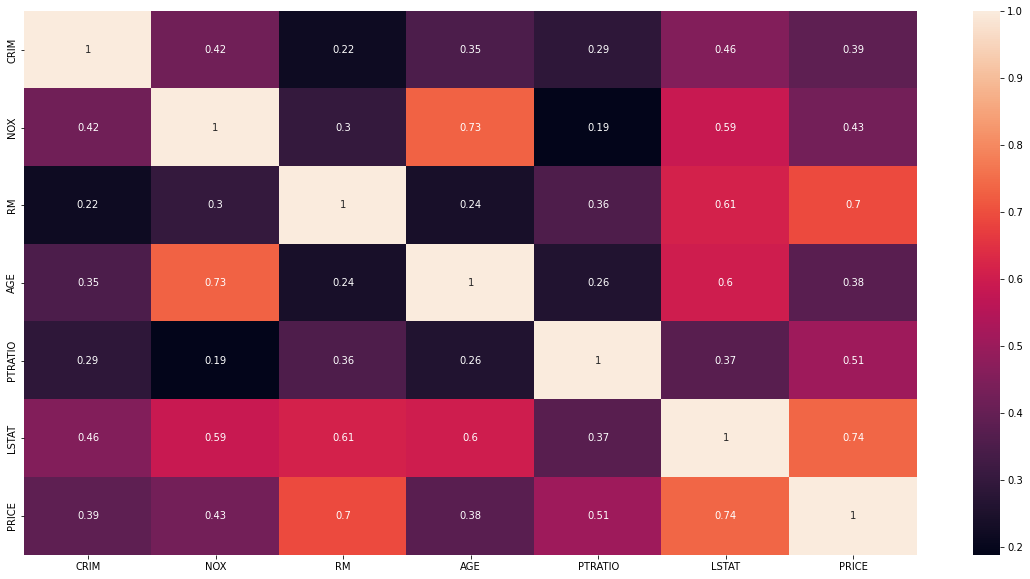

In [14]:
#Make a heatmap of the correlations.
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

In [30]:
#Select columns for your feature matrix (X) and select PRICE for your target vector (y)
#Split your data into train and test groups. Please use random number 42 for consistency!
y = data['PRICE']
X = data.drop(columns = 'PRICE')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
#Evaluate your model performance using R^2 on the training set and on the test set.  
#Is there a difference between model performance on the training data vs the test data?
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.6766769135023158
R2_score (train):  0.6954015699310794
R2_score (test):  0.6356314088765056
RMSE:  5.0513059374497615


In [29]:
#Evaluate your model using mean absolute error (MAE).
#Evaluate your model using mean squared error (MSE).  
# Model prediction on train data
y_pred = lm.predict(X_train)

print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6720205966729408
Adjusted R^2: 0.6663494830707438
MAE: 3.516168879715536
MSE: 24.687281800676494
RMSE: 4.968629770940525


In [39]:
#Evaluate your model performance using RMSE on the training set and on the test set. 
#This metric is useful because the units will be in the same units as your target vector. 
#In this case 1,000 of dollars.  
#For test data
# Model prediction on train data
y_pred = lm.predict(X_train)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Model prediction on test data
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6682701362678334
Adjusted R^2: 0.662534173206182
MAE: 3.5265776343060136
MSE: 24.96958206698571
RMSE: 4.996957280884609
R^2: 0.7077260468564788
Adjusted R^2: 0.6956319522436434
MAE: 3.723793352042672
MSE: 30.519267313350262
RMSE: 5.524424613781083


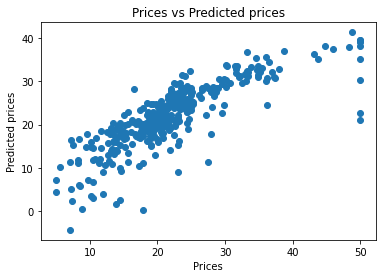

In [40]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()